# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [59]:
# import numpy and pandas

import numpy as np
import pandas as pd
from scipy import stats
import prince

# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [2]:
# Run this code:

pokemon = pd.read_csv('../pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [3]:
# Your code here:
pokemon.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [4]:
# Your code here:
pokemon['Legendary'].value_counts()


False    735
True      65
Name: Legendary, dtype: int64

Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [9]:
# Your code here:
leg_mean = np.mean(pokemon[pokemon['Legendary'] == True]['Total'])
leg_std = np.std(pokemon[pokemon['Legendary'] == True]['Total'])
non_leg_mean = np.mean(pokemon[pokemon['Legendary'] == False]['Total'])
non_leg_std = np.std(pokemon[pokemon['Legendary'] == False]['Total'])
print('Legendary mean: ', leg_mean)
print('Legendary std: ', leg_std)
print('Non-legendary mean: ', non_leg_mean)
print('Non-legendary std: ', non_leg_std)

Legendary mean:  637.3846153846154
Legendary std:  60.46682302213781
Non-legendary mean:  417.21360544217686
Non-legendary std:  106.68776660321996


The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [13]:
# Your code here:
total_legendary = pokemon[pokemon['Legendary']==True]['Total']
total_non_legendary = pokemon[pokemon['Legendary']==False]['Total']

stats.ttest_ind(total_legendary, total_non_legendary, equal_var=False)


Ttest_indResult(statistic=25.8335743895517, pvalue=9.357954335957446e-47)

What do you conclude from this test? Write your conclusions below.

In [6]:
# Your conclusions here:

'''
As the p-value is much lower than alpha (0.05), we can assume that there are statistically significant differences
between the mean value of total points of legendary pokemon and non legendary pokemon, so we can reject null hypothesis
'''


How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [18]:
# Your code here:

list_types = list(pokemon['Type 1'].unique())
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [19]:
# Your code here:
water_mean = np.mean(pokemon[pokemon['Type 1']=='Water']['Total'])
water_std = np.std(pokemon[pokemon['Type 1']=='Water']['Total'])
other_mean = np.mean(pokemon[pokemon['Type 1']!='Water']['Total'])
other_std = np.std(pokemon[pokemon['Type 1']!='Water']['Total'])

print('Water pokemon mean: ', water_mean)
print('Water pokemon std: ', water_std)
print('Non-water pokemon mean: ', other_mean)
print('Non-water pokemon std: ', other_std)


Water pokemon mean:  430.45535714285717
Water pokemon std:  112.68182832909096
Non-water pokemon mean:  435.85901162790697
Non-water pokemon std:  121.00364762501167


Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [20]:
# Your code here:
water_pokemon = pokemon[pokemon['Type 1']== 'Water']['Total']
non_water_pokemon = pokemon[pokemon['Type 1']!='Water']['Total']

stats.ttest_ind(water_pokemon, non_water_pokemon, equal_var=True)


Ttest_indResult(statistic=-0.4418547448849676, pvalue=0.6587140317488793)

Write your conclusion below.

In [10]:
# Your conclusions here:
'''
Given that the p-value is greater than alpha (0.05), we should accept the null hypothesis (both means are equal)
'''



# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [21]:
# Your code here:
stats.ttest_rel(pokemon['Attack'], pokemon['Defense'])


Ttest_relResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

Describe the results of the test in the cell below.

In [12]:
# Your conclusions here:
'''
We should reject null hypothesis and assume that both means are not equal
'''



We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [22]:
# Your code here:
stats.ttest_rel(pokemon['Sp. Atk'], pokemon['Sp. Def'])


Ttest_relResult(statistic=0.853986188453353, pvalue=0.3933685997548122)

Describe the results of the test in the cell below.

In [14]:
# Your conclusions here:

'''
We should accept the null hypothesis and assume that both means are equal
'''



As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [25]:
# Your code here:

pokemon['difference'] = pokemon['Defense'] - pokemon['Attack']

stats.ttest_1samp(pokemon['difference'], popmean=0)
    

Ttest_1sampResult(statistic=-4.325566393330478, pvalue=1.7140303479358558e-05)

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [57]:
# Your code here:

contingency_tab = pd.crosstab(pokemon['Legendary'], pokemon['Type 1']=='Water', colnames=['Water'])
contingency_tab


Water,False,True
Legendary,,
False,627,108
True,61,4


Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [58]:
# Your code here:
stats.chi2_contingency(contingency_tab)


(2.9429200762850503,
 0.08625467249550949,
 1,
 array([[632.1, 102.9],
        [ 55.9,   9.1]]))

Based on a 95% confidence, should we reject the null hypothesis?

In [19]:
# Your answer here:
'''
No, we should not reject the null hypothesis because the p-value is greater than alpha.
So we assume that the variables are independent. 

'''


### Correspondence Analysis

Just for practice and to know how to do it on Python, this is not part of the lab. 

In [89]:
types = pd.crosstab(pokemon['Type 1'], pokemon['Type 2'])
types


Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,2,2,14,1,6,2,0,0,12,0,3,7,1
Dark,0,0,3,0,0,2,3,5,2,0,0,2,0,0,2,0,2,0
Dragon,0,0,0,1,1,0,1,6,0,0,5,3,0,0,4,0,0,0
Electric,0,0,1,0,1,0,1,5,1,1,0,1,2,0,0,0,3,1
Fairy,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
Fighting,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3,0,2,0
Fire,0,0,1,0,0,7,0,6,0,0,3,0,2,0,2,1,1,1
Flying,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ghost,0,1,2,0,0,0,3,2,0,10,0,0,0,4,0,0,0,0


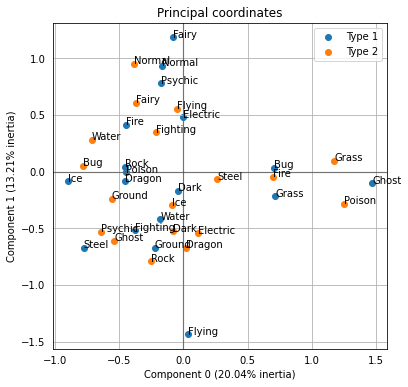

In [93]:
ca = prince.CA(n_components=2)
ca = ca.fit(types)
ax = ca.plot_coordinates(X=types, ax=None,
    figsize=(6,6),
    x_component=0,
    y_component=1)